In [1]:
# import necessary library

import pandas as pd
import numpy as np

In [2]:
#Loading data set

df=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


# Preprocessing

In [3]:
df.shape # Checking shape of data set

(1470, 35)

In [6]:
df.columns # checking column name of the data set.

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [7]:
df.info() # checking basic info about thid data set.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

We can see that currently there are 26 columns that have integer datatype and 9 columns that have object datatype. We will need to treat the object datatype columns so that our machine learning model can understand the data since the acceptance of numerical data is mandatory.

In [11]:
df['Attrition'].unique() 
# We have checked out target variable unique details
# there are only two class Yes or No. so this is a classification problem.

array(['Yes', 'No'], dtype=object)

In [15]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

We are checking the total number of unique values present in each column be it categorical or numerical data.

In [16]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

we do not have any missing values in any of our columns so we won't have to worry about handling missing data.

In [17]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


With the help of decribe method in transpose format we are able to take a look at our column details clearly. The count column once again confirms that there are no missing data concern in our dataset. However if we check the min column we do notice columns with zero as their values. However considering the columns that have 0 value in them it is quite possible for freshers in an organisation to have them as 0 marked in their records.
Here we only get numerical data information therefore all the object datatype columns have been ignored

In [18]:
#Dropping some unwanted columns.

df.drop(["EmployeeCount", "EmployeeNumber", "Over18", "StandardHours"], axis=1, inplace=True)


I am dropping all the unwanted columns after careful observations done above.

1. EmployeeCount - All the rows in this column are filled with just a single number "1" which cannot provide much information related to attrition of an employee
2. EmployeeNumber - Since it is just a unique number provided to each employee that has nothing to do with attrition
3. Over18 - As per child labour law any person below the age of 18 is not eligible for employement in India and also this particular column has 1 single value for all the rows therefore it does not add much value considering the attrition of the employees
4. StandardHours - Again in this column we have single value for all the rows that is "80" hours as a standardized policy so does not make much difference with respect to attrition as there is no partiality in these terms on any employee

# Visualization

In [19]:
# In Exploratory Data Analysis we will plot countplot to check the counts of categorical features.

# Importing necessary library

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

No     1233
Yes     237
Name: Attrition, dtype: int64


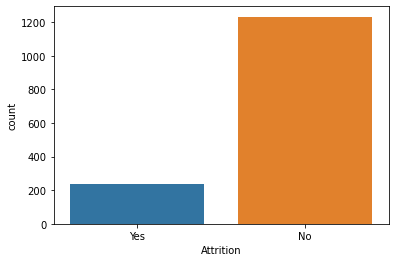

In [20]:
# Checking Attrition column
sns.countplot(x='Attrition',data=df)
print(df['Attrition'].value_counts())

So looking at the above countplot we can see that our target label is quite imbalanced and will needed to be treated for the same.

Male      882
Female    588
Name: Gender, dtype: int64


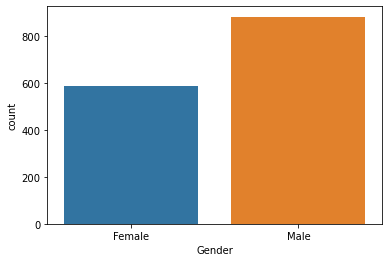

In [21]:
# Checking Gender column
sns.countplot(x='Gender',data=df)
print(df['Gender'].value_counts())

In the Gender column we can see that the number of male employees is higher than the female employees. 

No     1054
Yes     416
Name: OverTime, dtype: int64


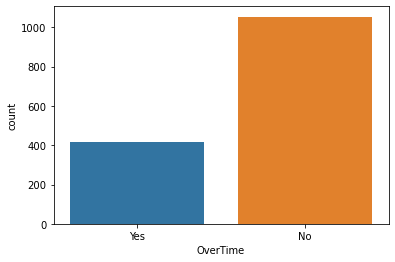

In [22]:
# Checking OverTime column
sns.countplot(x='OverTime',data=df)
print(df['OverTime'].value_counts())

The OverTime column shows us the number of employees who do over time and the one's who do not. And it looks like from the above count plot that employees do not prefer doing over time in the company.

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


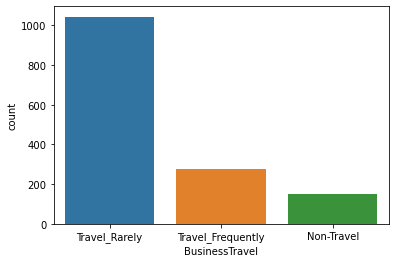

In [23]:
# Checking BusinessTravel column
sns.countplot(x='BusinessTravel',data=df)
print(df['BusinessTravel'].value_counts())

In the BusinessTravel column we see a majority of number in the Travel_Rarely value while Non_Travel are the least of them.

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


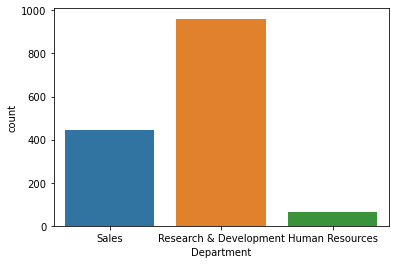

In [24]:
# Checking Department column
sns.countplot(x='Department',data=df)
print(df['Department'].value_counts())

In the Department column we see lots of values for R&D department however the least number of employees are in HR since an organisation would need a limited number of Human Resources team it makes sense for it to have the least value.

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64


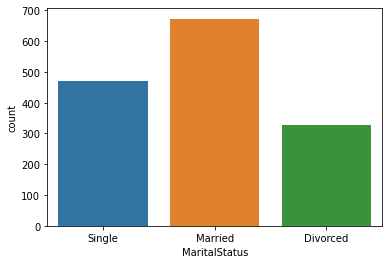

In [25]:
# Checking Married column
sns.countplot(x='MaritalStatus',data=df)
print(df['MaritalStatus'].value_counts())

In the MaritalStatus column plot we can see that the number of married employees is highest and the number of divorced employees is lowest.

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64


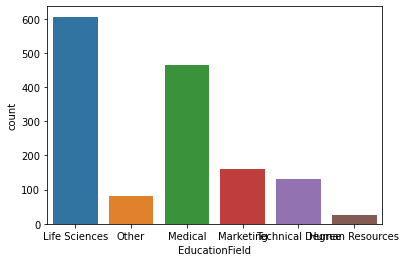

In [26]:
# Checking Married column
sns.countplot(x='EducationField',data=df)
print(df['EducationField'].value_counts())

For the EducationField column we have employees majorly from the Life Sciences educational background and the least from HR since that department needs lesser number of employees to contribute in the organization.

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64


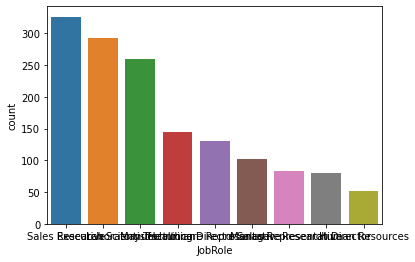

In [29]:
# Checking Married column
sns.countplot(x='JobRole',data=df)
print(df['JobRole'].value_counts())

Pertaining to the JobRole column we can see that the highest number is found in sales executive designation since they are the grass root level employees who are the most productive and handle the business value directly. And as notice in other plots we have the lowest number for HR roles as the employees present in that department are the lowest as well.

# Analysis on Continuous Data

In [71]:
integer_datatype=[]
for column in df:
    if df[column].dtype=='int64' and len(df[column].unique())>=10:       # for continuous column we use unique>=10
        integer_datatype.append(column)   
integer_datatype

['Age',
 'DailyRate',
 'DistanceFromHome',
 'HourlyRate',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [70]:
object_datatype = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        object_datatype.append(x)
object_datatype

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

<function matplotlib.pyplot.show(close=None, block=None)>

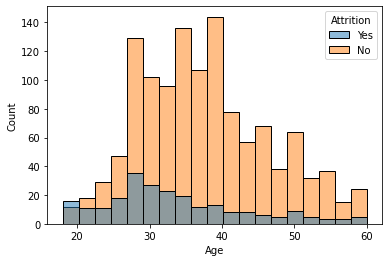

In [48]:
#Age vs Attrition Count

sns.histplot(x=df.Age,hue=df.Attrition)
plt.show

1. Emlployee in age of 25 to 35  are more likely to leave the job.
2. After 40 yrs of age there is a less attrition. (Mean higher the age less the attrition)

<AxesSubplot:xlabel='DistanceFromHome', ylabel='Count'>

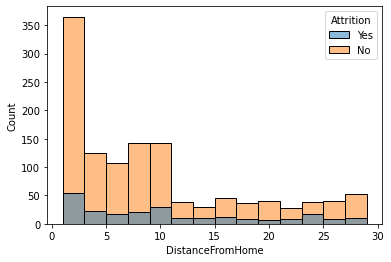

In [51]:
# Distance From Home Vs Attrition
sns.histplot(x=df.DistanceFromHome,hue=df.Attrition)

1. Employee who has distance range of 0-10 are more likely to leave the job

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Count'>

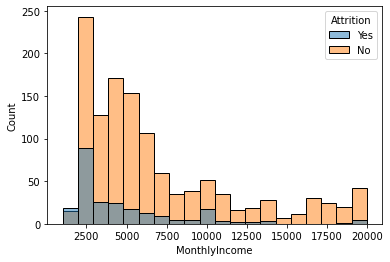

In [53]:
# Monthly income vs Attrition
sns.histplot(x=df.MonthlyIncome,hue=df.Attrition)

1. Higher the income, less attrition in this data set
2. who is getting less salary, showing higher attrition rate, and leaving the job frequently.

<AxesSubplot:xlabel='NumCompaniesWorked', ylabel='Count'>

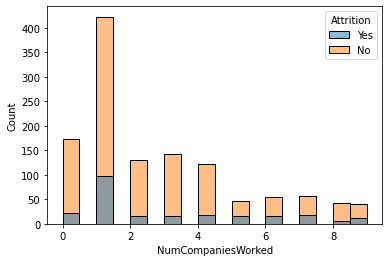

In [57]:
# Impact of NumCompaniesWorked on Attrition Rate
sns.histplot(x=df.NumCompaniesWorked,hue=df.Attrition)

Only the employess who has worked with only one company before this company are more likely to left the job. Rest are seems fine.

<AxesSubplot:xlabel='PercentSalaryHike', ylabel='Count'>

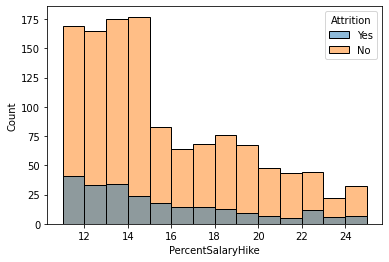

In [60]:
# Now check how PercentSalaryHike relate to Attrition Rate 
sns.histplot(x=df.PercentSalaryHike,hue=df.Attrition)

1. higher the percent salary hike, lesser the attrition rate

<AxesSubplot:xlabel='YearsAtCompany', ylabel='Count'>

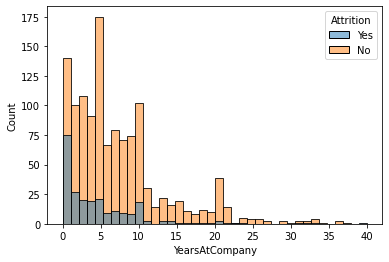

In [63]:
# YearsAtCompany vs Attrition Rate
sns.histplot(x=df.YearsAtCompany,hue=df.Attrition)

1. Freshers are more likely to left the job very frequently from 0-5 (Maximum)

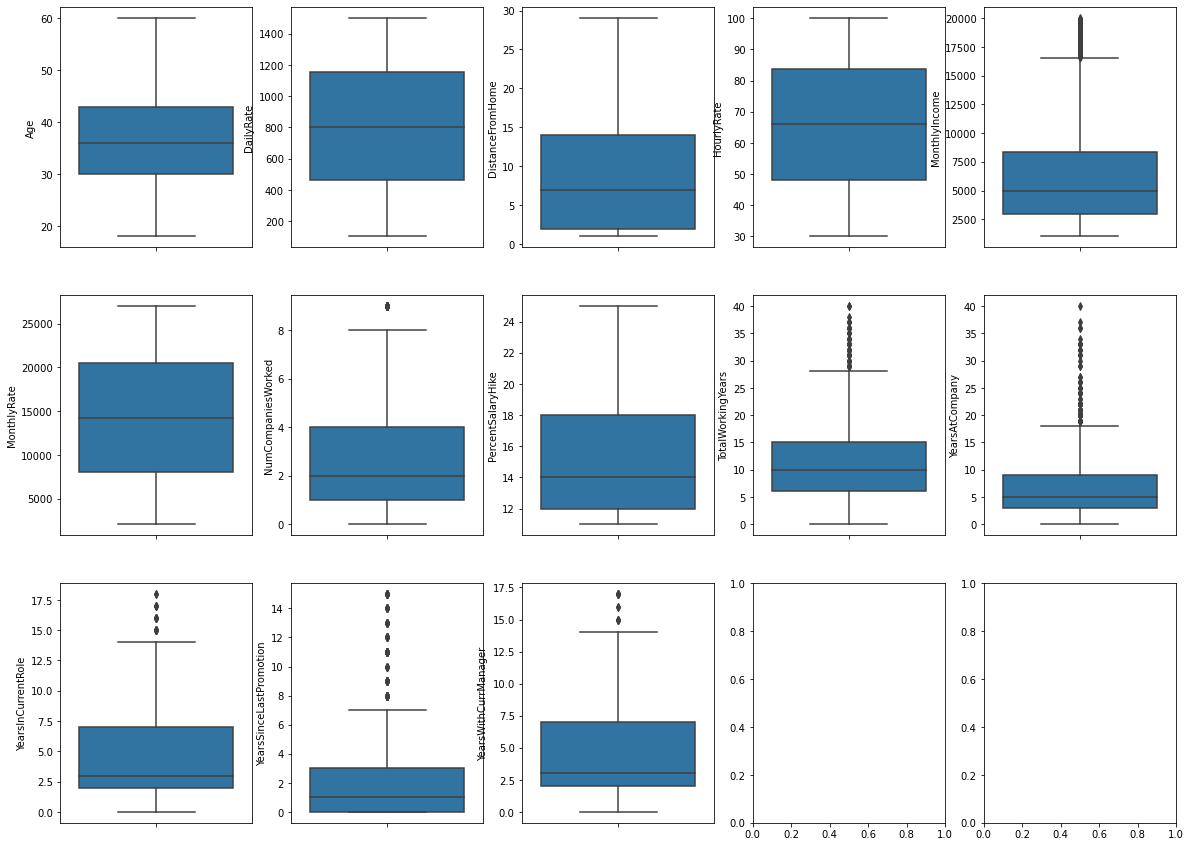

In [78]:
fig, ax = plt.subplots(ncols=5, nrows=3, figsize=(20,15))
index = 0
ax = ax.flatten()
for col, value in df[integer_datatype].items():
    sns.boxplot(y=col, data=df, ax=ax[index], )
    index += 1
plt.show()

We have created a box plot visual for all our integer datatype columns to check for outliers. We do see some of the columns where there are presence of outliers and we will need to treat it accordingly.

1.MonthlyIncome
2.NumCompaniesWorked
3.TotalWorkingYears
4.YearsAtCompany
5.YearsInCurrentRole
6.YearsSinceLastPromotion
7.YearsWithCurrManager
All the above columns show visible outlier details.

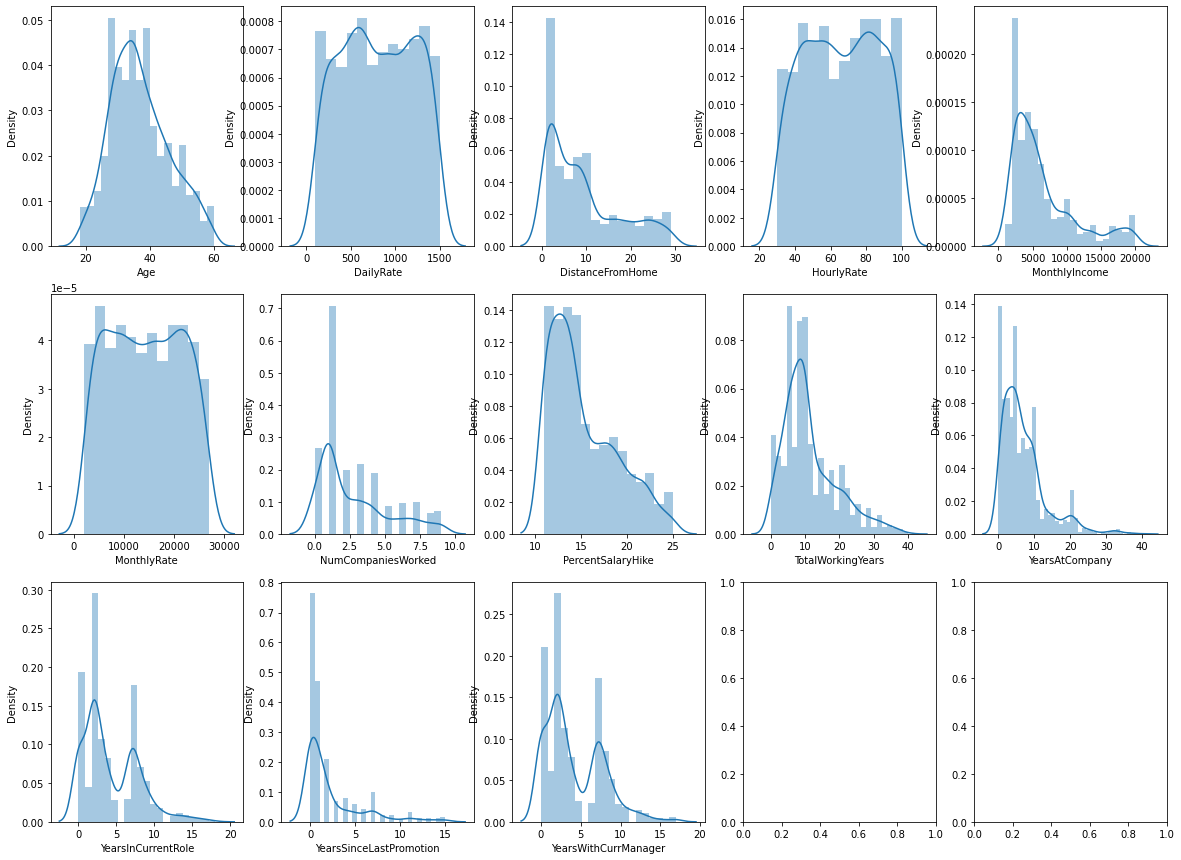

In [79]:
fig, ax = plt.subplots(ncols=5, nrows=3, figsize=(20,15))
index = 0
ax = ax.flatten()
for col, value in df[integer_datatype].items():
    sns.distplot(value, ax=ax[index])
    index += 1
plt.show()

# Encoding of Categorical Column

In [80]:
# Label Encoder for our Target Variable
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df["Attrition"])
le.classes_
pd.Series(le.transform(df["Attrition"])).head()

0    1
1    0
2    1
3    0
4    0
dtype: int32

I am using Label Encoder on our target column since we want our labels to be converted from the object datatype to numerical datatype.

In [81]:
df["Attrition"] = le.fit_transform(df["Attrition"])
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


We can see that our target label has been successfully updated into numerical format containing binary values of 0 and 1 where 1 shows Attrition Yes and 0 shows Attrition No.

In [82]:
# Ordinal Encoder 
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()
df['BusinessTravel'] = oe.fit_transform(df['BusinessTravel'].values.reshape(-1,1))
df['Department'] = oe.fit_transform(df['Department'].values.reshape(-1,1))
df['EducationField'] = oe.fit_transform(df['EducationField'].values.reshape(-1,1))
df['Gender'] = oe.fit_transform(df['Gender'].values.reshape(-1,1))
df['JobRole'] = oe.fit_transform(df['JobRole'].values.reshape(-1,1))
df['MaritalStatus'] = oe.fit_transform(df['MaritalStatus'].values.reshape(-1,1))
df['OverTime'] = oe.fit_transform(df['OverTime'].values.reshape(-1,1))

I am using the Ordinal Encoder to convert all the categorical feature columns from object datatype to integer datatype.

In [83]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2.0,1102,2.0,1,2,1.0,2,0.0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1.0,279,1.0,8,1,1.0,3,1.0,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2.0,1373,1.0,2,2,4.0,4,1.0,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1.0,1392,1.0,3,4,1.0,4,0.0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2.0,591,1.0,2,1,3.0,1,1.0,...,3,4,1,6,3,3,2,2,2,2


In the above dataframe we can clearly see that all our object datatype columns are now converted to numerical datatype which can be used in our machine learning models.

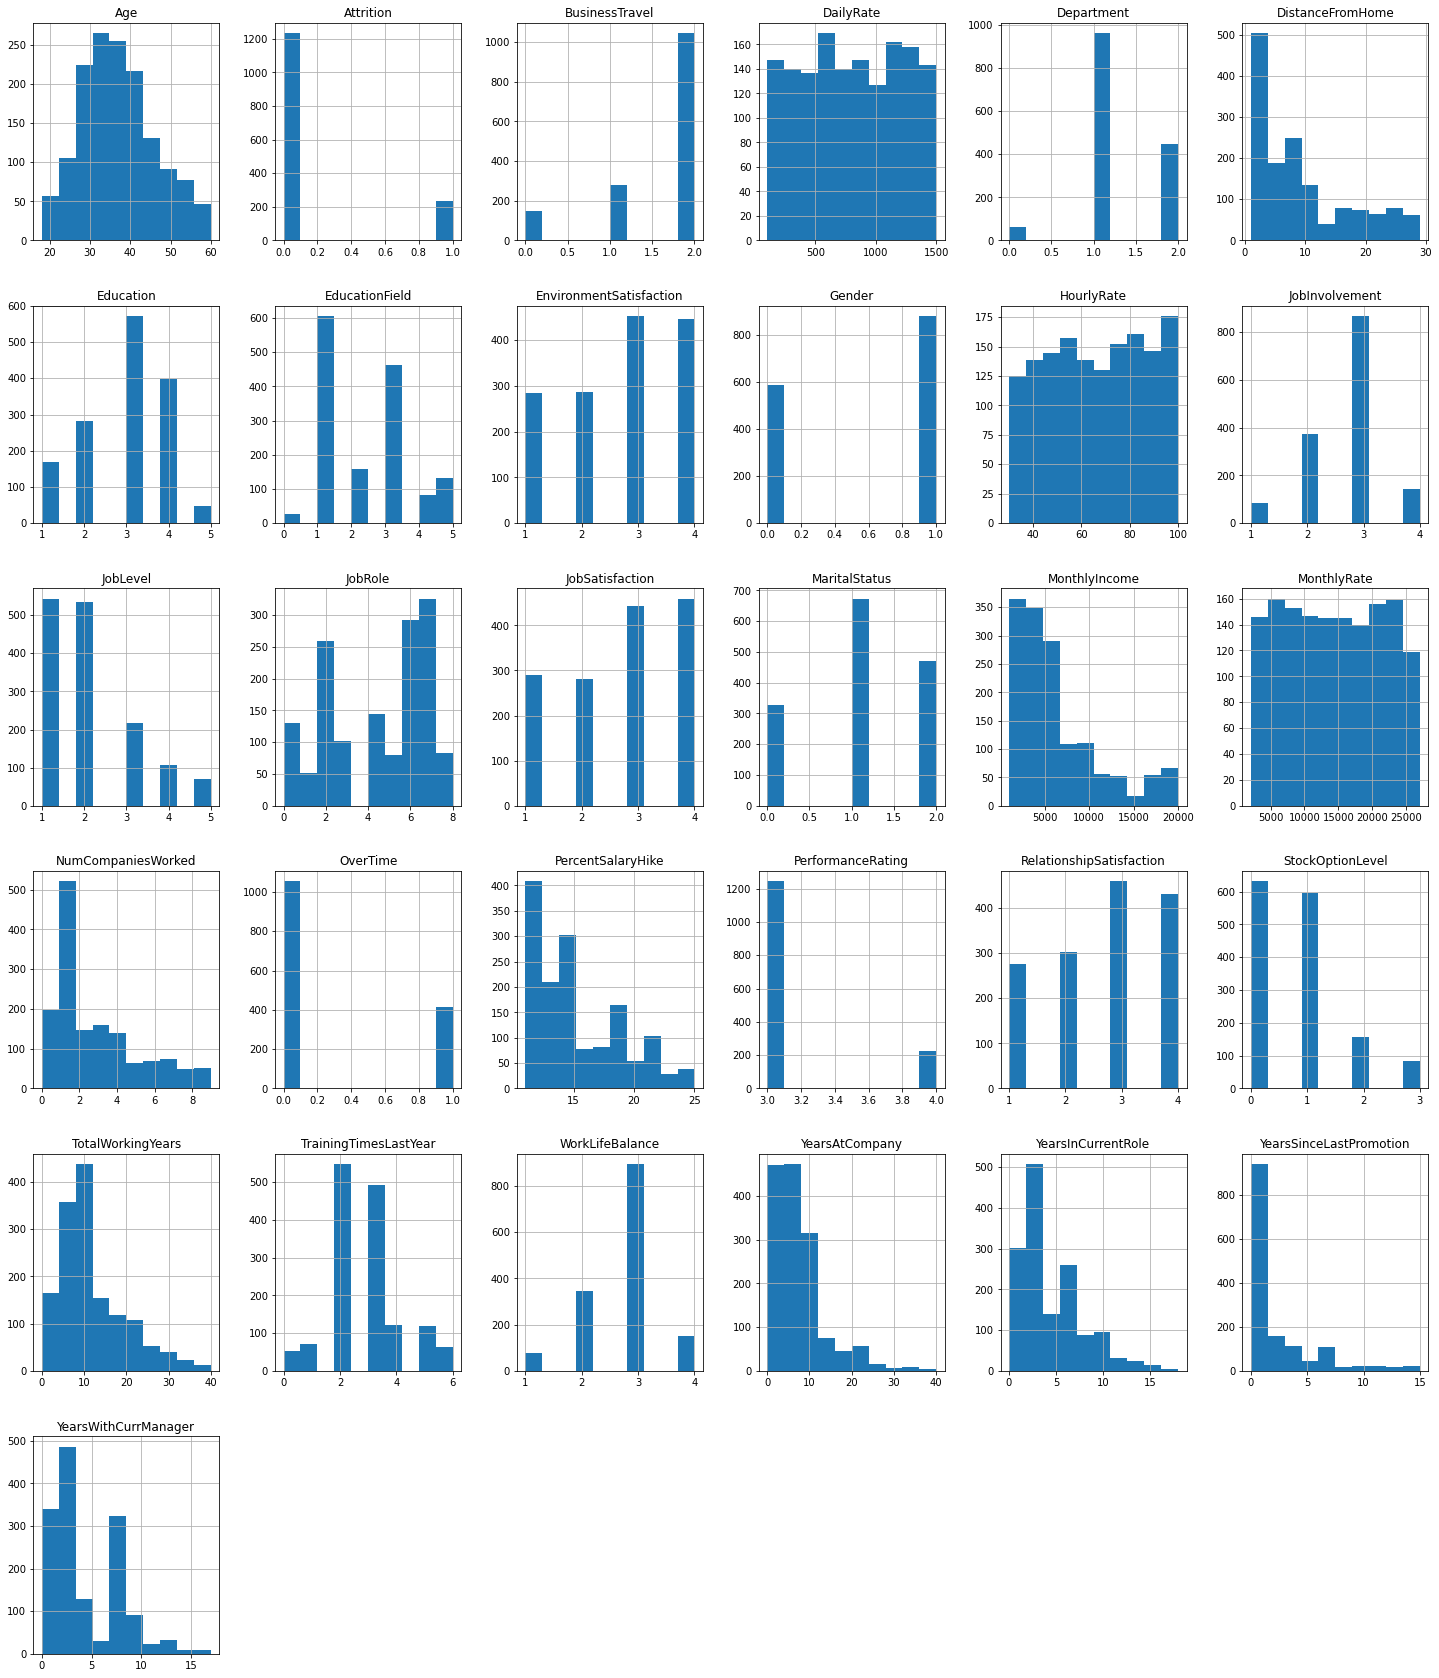

In [87]:
df.hist(figsize=(25,30))
plt.show()

Using the above histogram we are able to plot all the columns of are dataset post application of encoding technique where we do not have any object datatype columns anymore.

# Correlation using HeatMap

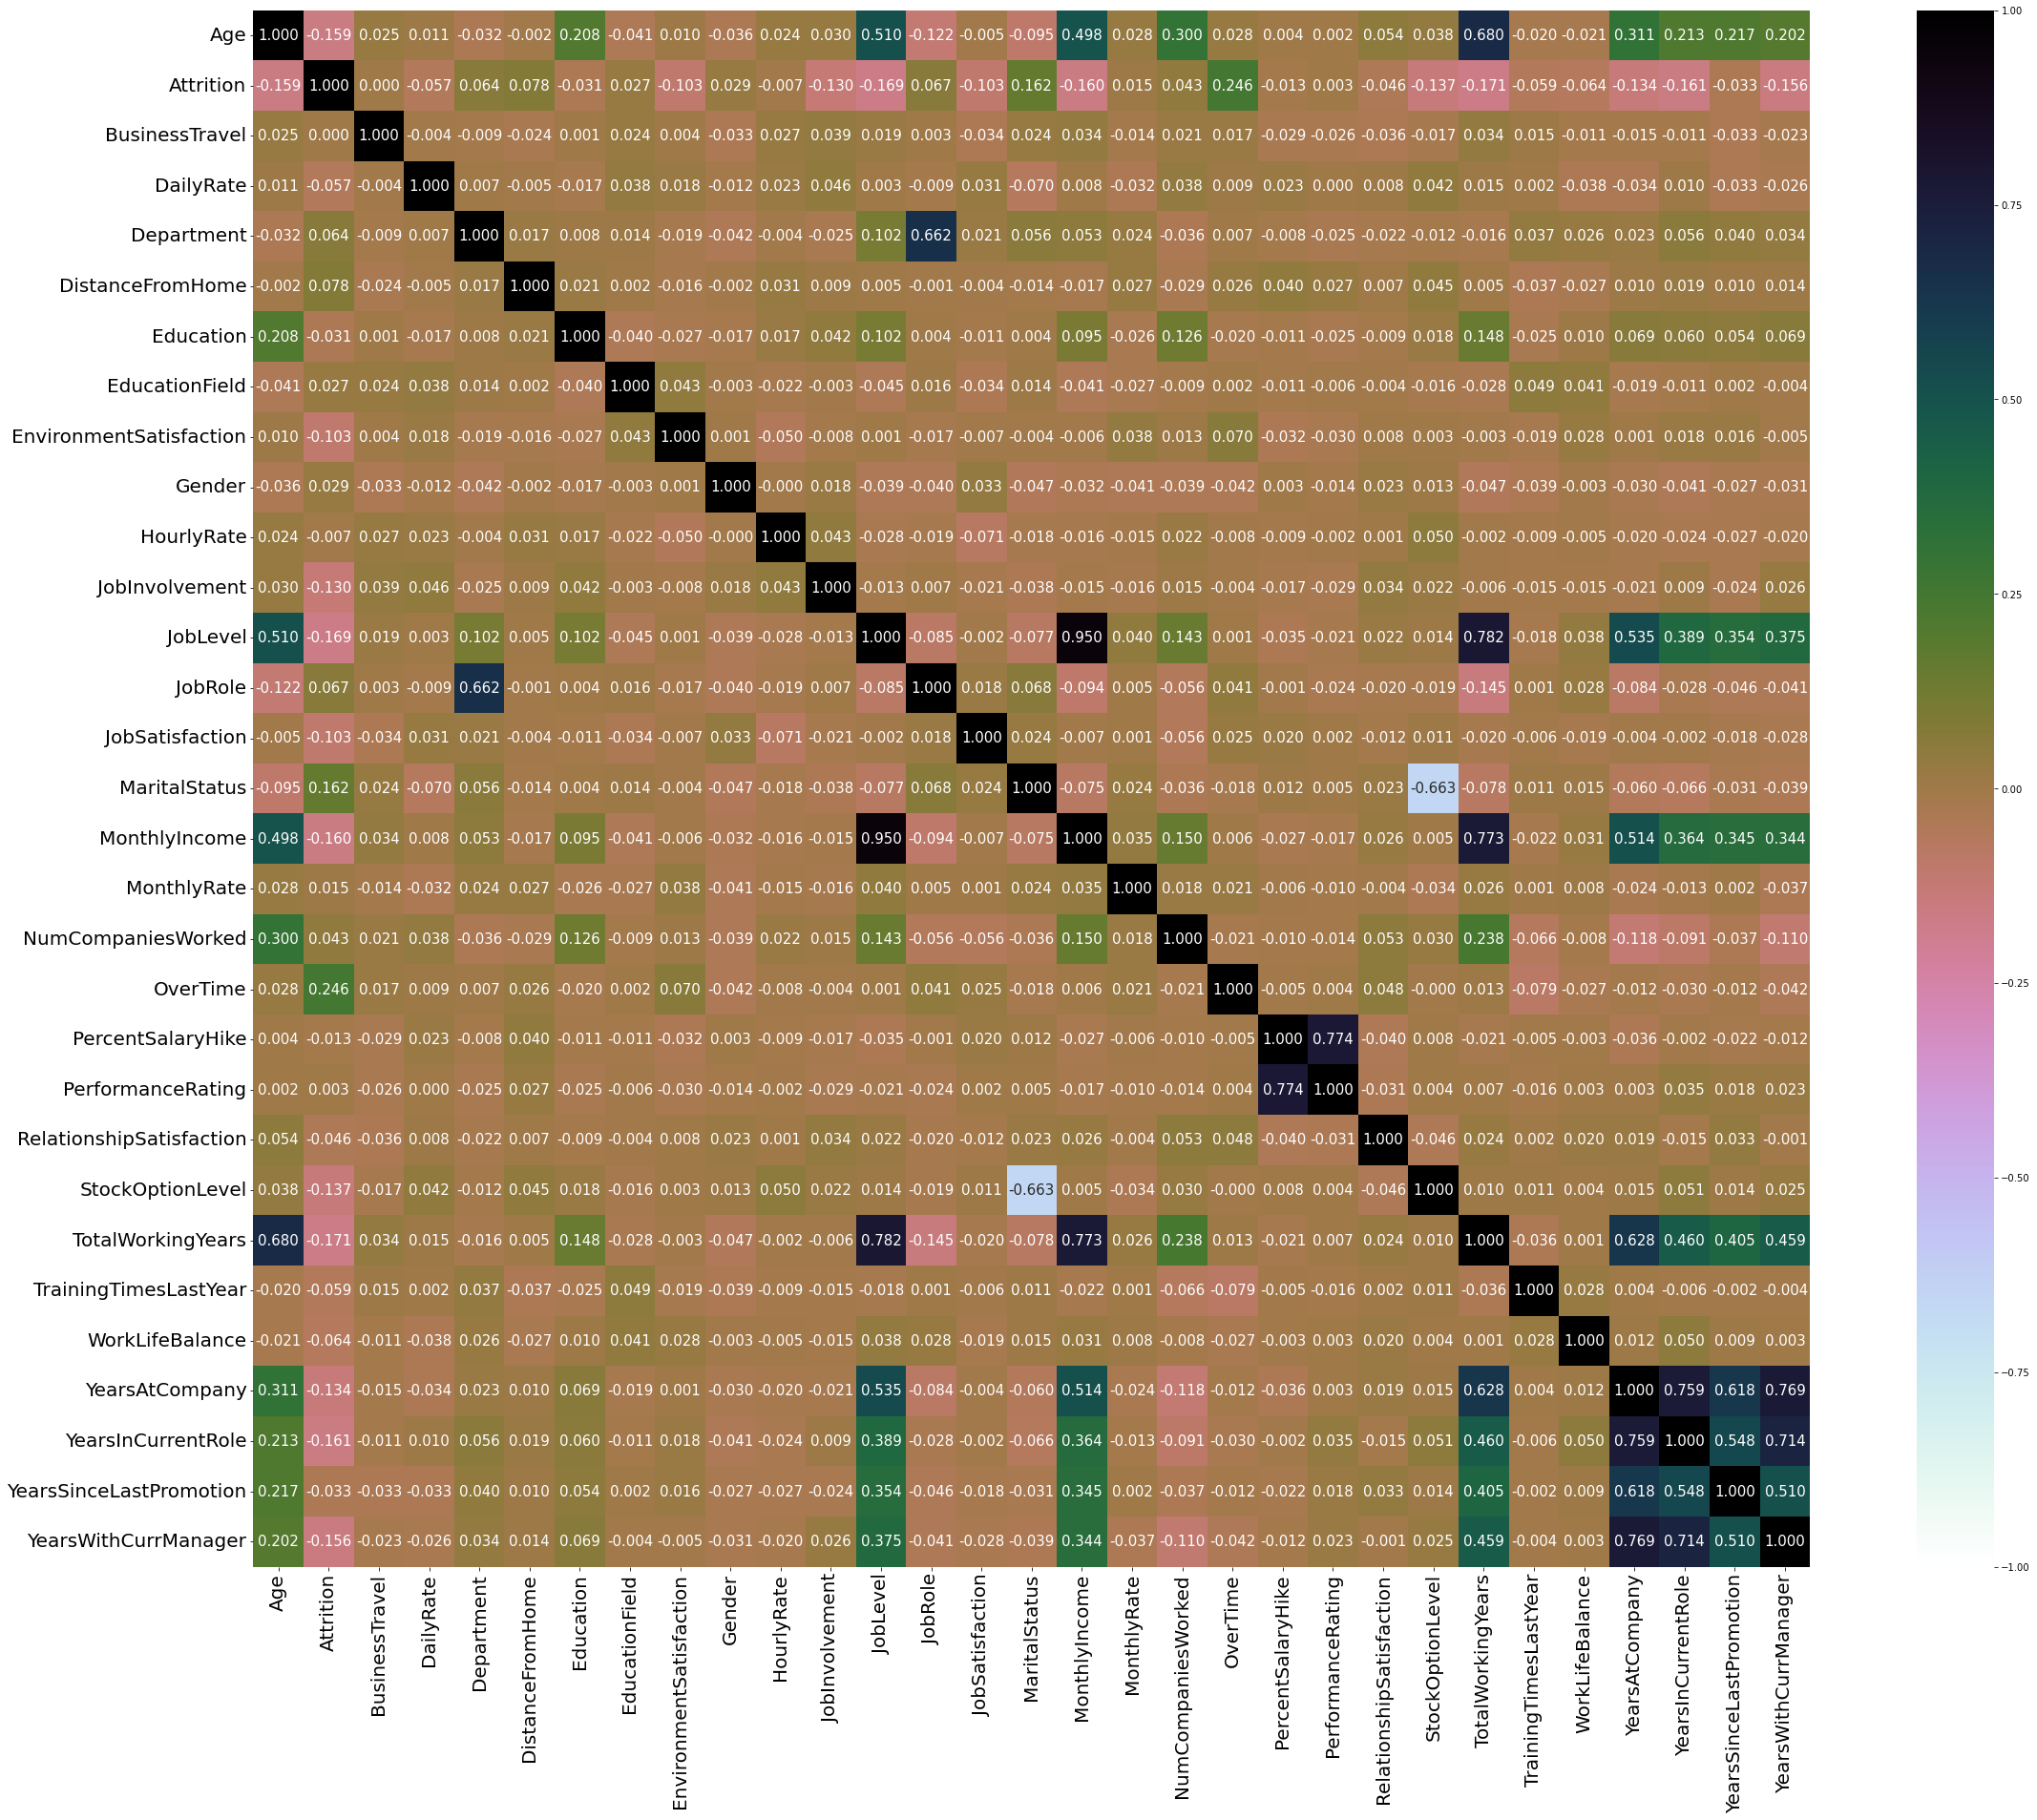

In [98]:
plt.figure(figsize=(40,30))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':15}, cmap="cubehelix_r")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In the above heatmap we can see that our target label "Attrition" has both positive and negative correlations with the feature columns. Also we see very less or negligible amount of multi colinearity so we will not have to worry about it. Since the one's which are reflecting the value are inter dependent on those feature columns and I intend to retain and keep them.

# Correlation Bar Plot comparing features with our label

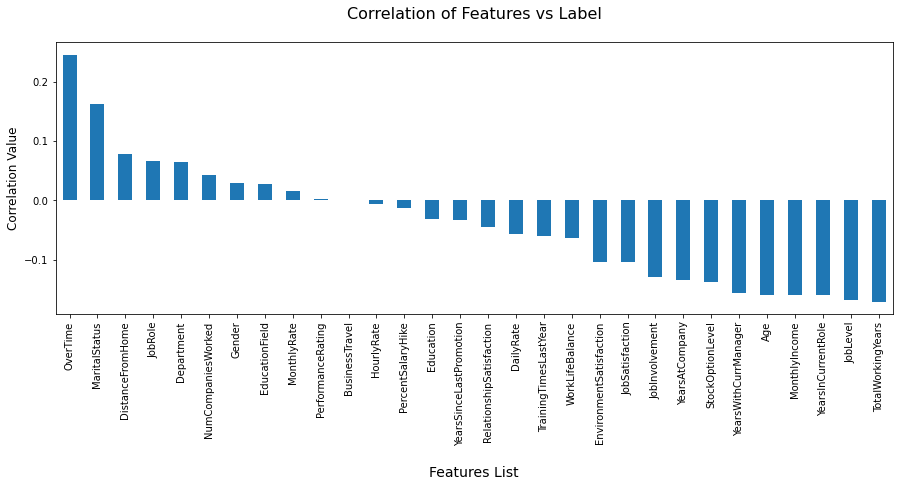

In [99]:
df_corr = df.corr()
plt.figure(figsize=(15,5))
df_corr['Attrition'].sort_values(ascending=False).drop('Attrition').plot.bar()
plt.title("Correlation of Features vs Label\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

In the above Bar Plot we are able to clearly define the feature columns that are positively correlated with our label and the feature columns that are negatively correlated with our label.

# Using Z Score to remove outliers

In [101]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy() # reassigning the changed dataframe name to our original dataframe name

Shape of the dataframe before removing outliers:  (1470, 31)
Shape of the dataframe after removing outliers:  (1387, 31)
Percentage of data loss post outlier removal:  5.646258503401361


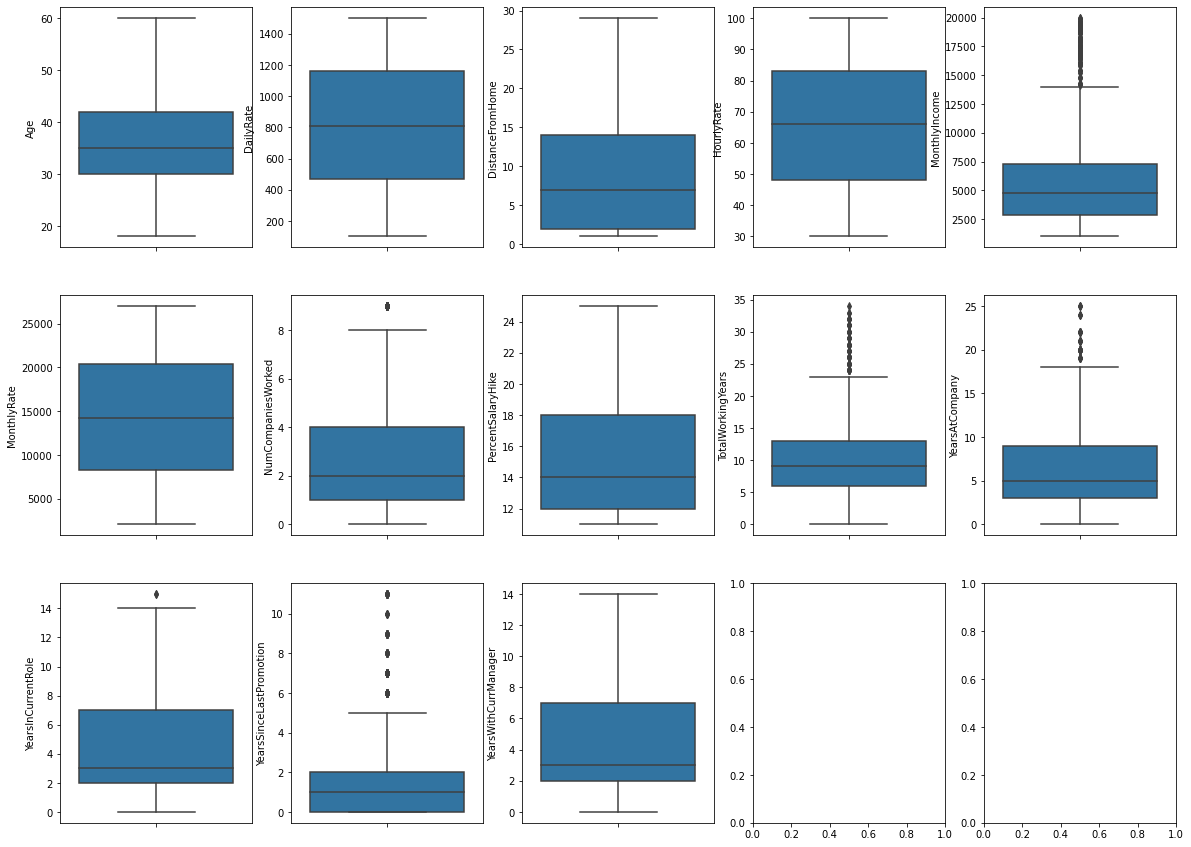

In [102]:
fig, ax = plt.subplots(ncols=5, nrows=3, figsize=(20,15))
index = 0
ax = ax.flatten()
for col, value in df[integer_datatype].items():
    sns.boxplot(y=col, data=df, ax=ax[index], )
    index += 1
plt.show()

In the above box plot we can see that whatever outliers we could have afforded to lose from our numerical columns we have gotten rid of it. There are still presence of outliers but since they are in continous format we shall ignore it.

In [103]:
# Checking Skewness
df.skew()

Age                         0.472280
Attrition                   1.805983
BusinessTravel             -1.426774
DailyRate                  -0.017078
Department                  0.183919
DistanceFromHome            0.954752
Education                  -0.289024
EducationField              0.544868
EnvironmentSatisfaction    -0.325285
Gender                     -0.417296
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobRole                    -0.386843
JobSatisfaction            -0.345612
MaritalStatus              -0.160952
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
OverTime                    0.954751
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
Y

In [104]:
# Using Log Transform to fix skewness
for col in integer_datatype:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

I have applied Log Transformation on our numerical integer datatype columns to ensure that we do not have skewness in our dataset.

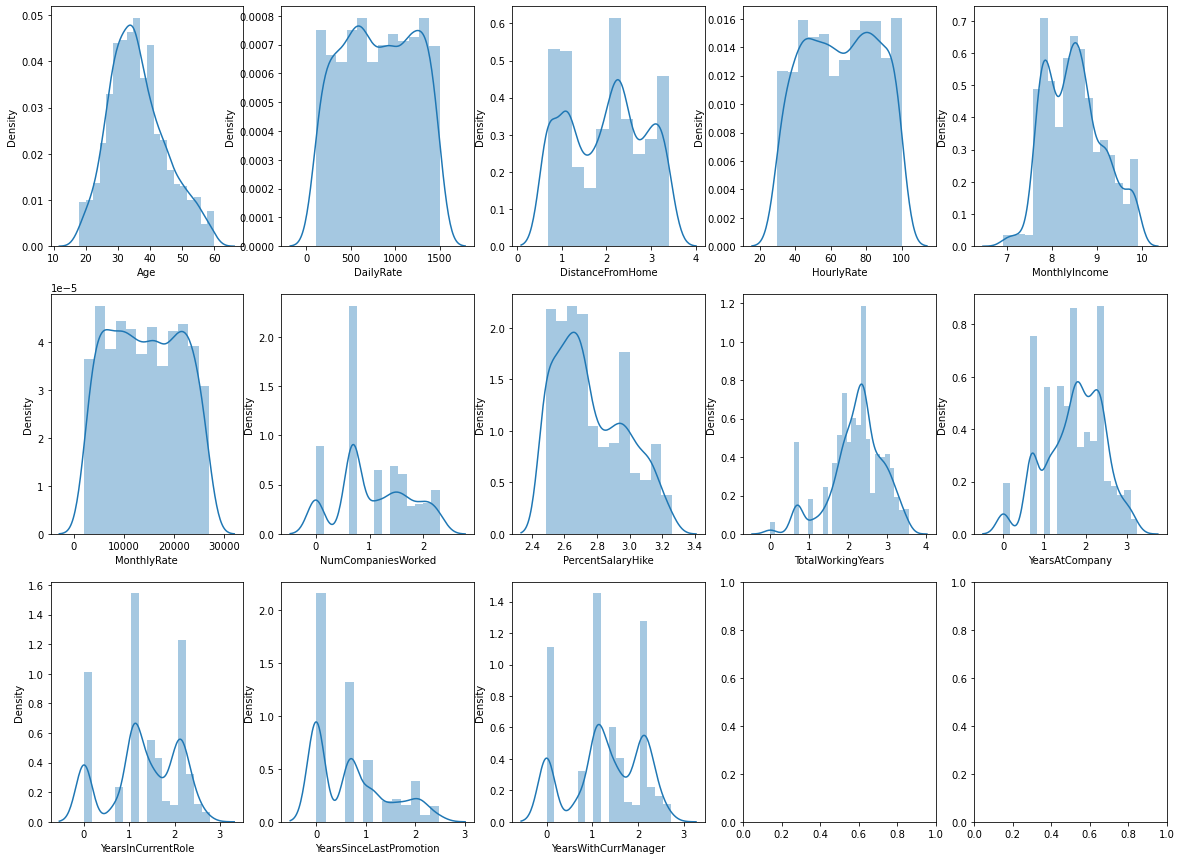

In [105]:
#again Checking with distplot

fig, ax = plt.subplots(ncols=5, nrows=3, figsize=(20,15))
index = 0
ax = ax.flatten()
for col, value in df[integer_datatype].items():
    sns.distplot(value, ax=ax[index])
    index += 1
plt.show()

# Splitting the dataset into 2 variables namely 'X' and 'Y' for feature and label

In [107]:
X = df.drop('Attrition', axis=1)
Y = df['Attrition']

I have bifurcated the dataset into features and labels where X represents all the feature columns and Y represents the target label column.

# Resolving the class imbalance issue in label column


In [108]:
Y.value_counts()

0    1158
1     229
Name: Attrition, dtype: int64

Listing the values of our label column to count the number of rows occupied by each category. This indicates class imbalance that we will need to fix by using the oversampling method.

In [109]:
# adding samples to make all the categorical quality values same
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

SMOTE is the over sampling mechanism that we are using to ensure that all the categories present in our target label have the same value.

In [110]:
Y.value_counts() # Again Checking

1    1158
0    1158
Name: Attrition, dtype: int64

# Feature Scaling

In [111]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()


,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.711515,0.666609,0.834676,1.431467,-1.684108,-0.760936,-1.026257,-0.438741,-1.379328,1.493403,...,-0.343163,-1.422334,-0.732302,0.143699,-2.074507,-2.123745,0.484145,0.557099,-0.985884,0.825819
1,1.652281,-1.001342,-1.282026,-0.584358,0.189331,-1.793349,-1.026257,0.493483,0.835802,-0.268336,...,2.914070,1.394763,0.530551,0.445484,0.349181,0.550857,1.143048,1.190543,0.008951,1.204087
2,0.241132,0.666609,1.531670,-0.584358,-1.179072,-0.760936,1.364657,1.425707,0.835802,1.386631,...,-0.343163,-0.483302,-0.732302,-0.033433,0.349181,0.550857,-2.352597,-1.612006,-0.985884,-1.530138
3,-0.229251,-1.001342,1.580537,-0.584358,-0.820742,1.303889,-1.026257,1.425707,-1.379328,-0.535267,...,-0.343163,0.455731,-0.732302,0.143699,0.349181,0.550857,0.850511,1.190543,1.003785,-1.530138
4,-0.934825,0.666609,-0.479583,-0.584358,-1.179072,-1.793349,0.567686,-1.370965,0.835802,-1.389444,...,-0.343163,1.394763,0.530551,-0.234249,0.349181,0.550857,-0.751043,-0.131361,0.590891,-0.085590


I am scaling my feature data to ensure that there is no issue with the data biasness over a particular column instead a standardization will occur helping us in having a uniform dataset value.

# Finding best random state for building Regression Models

In [112]:

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=i)
    lr=LogisticRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    acc_score = (accuracy_score(Y_test, pred))*100
    
    if acc_score>maxAccu:
        maxAccu=acc_score
        maxRS=i

print("Best accuracy score is", maxAccu,"on Random State", maxRS)


Best accuracy score is 90.32815198618307 on Random State 918


# Train Test Split

In [114]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=759)


I am taking 25 percent of the complete dataset for training purpose and the remaing 75 percent with be used to train the machine learning models using the random state as 759

# Machine Learning Model for Classification with Evaluation Metrics

In [115]:
# Classification Model Function

def classify(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=759)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # Accuracy Score
    acc_score = (accuracy_score(Y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Classification Report
    class_report = classification_report(Y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)


I have defined a class that will perform the train-test split, training of machine learning model, predicting the label value, getting the accuracy score, generating the classification report, getting the cross validation score and the result of difference between the accuracy score and cross validation score for any machine learning model that calls for this function.

In [125]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [126]:
# Logistic Regression

model=LogisticRegression()
classify(model, X, Y)

Accuracy Score: 89.63730569948186

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90       291
           1       0.89      0.91      0.90       288

    accuracy                           0.90       579
   macro avg       0.90      0.90      0.90       579
weighted avg       0.90      0.90      0.90       579

Cross Validation Score: 85.71348774856631

Accuracy Score - Cross Validation Score is 3.9238179509155486


Created the Logistic Regression Model and checked for it's evaluation metrics.

In [127]:
# Support Vector Classifier

model=SVC(C=1.0, kernel='rbf', gamma='auto', random_state=42)
classify(model, X, Y)

Accuracy Score: 93.95509499136442

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94       291
           1       0.94      0.94      0.94       288

    accuracy                           0.94       579
   macro avg       0.94      0.94      0.94       579
weighted avg       0.94      0.94      0.94       579

Cross Validation Score: 89.04232144187085

Accuracy Score - Cross Validation Score is 4.912773549493565


Created the Support Vector Classifier Model and checked for it's evaluation metrics.

In [135]:
# Decision Tree Classifier

model=DecisionTreeClassifier(random_state=19, max_depth=5)
classify(model, X, Y)

Accuracy Score: 85.31951640759931

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.84      0.85       291
           1       0.84      0.87      0.85       288

    accuracy                           0.85       579
   macro avg       0.85      0.85      0.85       579
weighted avg       0.85      0.85      0.85       579

Cross Validation Score: 84.59214642138974

Accuracy Score - Cross Validation Score is 0.7273699862095668


Created the Decision Tree Classifier Model and checked for it's evaluation metrics.

In [129]:
# Random Forest Classifier

model=RandomForestClassifier(max_depth=15, random_state=111)
classify(model, X, Y)

Accuracy Score: 93.78238341968913

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94       291
           1       0.97      0.90      0.94       288

    accuracy                           0.94       579
   macro avg       0.94      0.94      0.94       579
weighted avg       0.94      0.94      0.94       579

Cross Validation Score: 90.85704178148507

Accuracy Score - Cross Validation Score is 2.92534163820406


Created the Random Forest Classifier Model and checked for it's evaluation metrics.

In [130]:
# K Neighbors Classifier

model=KNeighborsClassifier(n_neighbors=5)
classify(model, X, Y)

Accuracy Score: 83.41968911917098

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.68      0.80       291
           1       0.75      0.99      0.86       288

    accuracy                           0.83       579
   macro avg       0.87      0.83      0.83       579
weighted avg       0.87      0.83      0.83       579

Cross Validation Score: 83.20473672451033

Accuracy Score - Cross Validation Score is 0.2149523946606564


Created the K Neighbors Classifier Model and checked for it's evaluation metrics.

# Hyper parameter tuning on the best Classification ML Model

In [136]:
# Choosing Decision Tree Classifier

fmod_param = {'criterion' : ["gini", "entropy"],
              'splitter' : ["best", "random"],
              'min_samples_split' : [2, 3, 4],
              'max_depth' : [4, 6, 8],
              'random_state' : [42, 111, 759]
             }

After comparing all the regression models I have selected Decision Tree Classifier as my best model and have listed down it's parameters above referring the sklearn webpage

In [137]:
GSCV = GridSearchCV(DecisionTreeClassifier(), fmod_param, cv=5)

I am using the Grid Search CV method for hyper parameter tuning my best model.

In [138]:
GSCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8], 'min_samples_split': [2, 3, 4],
                         'random_state': [42, 111, 759],
                         'splitter': ['best', 'random']})

In [139]:
GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8], 'min_samples_split': [2, 3, 4],
                         'random_state': [42, 111, 759],
                         'splitter': ['best', 'random']})

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8], 'min_samples_split': [2, 3, 4],
                         'random_state': [42, 111, 759],
                         'splitter': ['best', 'random']})

I have trained the Grid Search CV with the list of parameters I feel it should check for best possible outcomes

In [143]:
GSCV.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'min_samples_split': 4,
 'random_state': 759,
 'splitter': 'random'}

Here the Grid Search CV has provided me with the best parameters list out of all the combinations it used to train the model

In [141]:
GSCV.best_score_

0.8301715856769022

Here the Grid Search CV has provided me with the best score details

In [142]:
Final_Model = DecisionTreeClassifier(criterion="entropy", max_depth=8, min_samples_split=4, 
                                     random_state=42, splitter="best")
Classifier = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_acc = (accuracy_score(Y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)


Accuracy score for the Best Model is: 86.18307426597582


I have successfully incorporated the Hyper Parameter Tuning on my Final Model and received the accuracy score for it.

# AUC ROC Curve

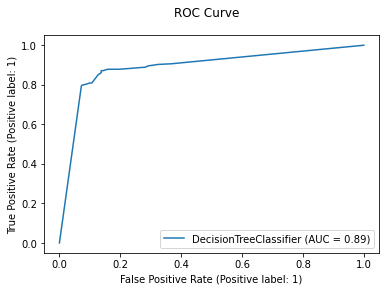

In [144]:
disp = metrics.plot_roc_curve(Final_Model, X_test, Y_test)
disp.figure_.suptitle("ROC Curve")
plt.show()

I have generated the ROC Curve for my final model and it shows the AUC score for my final model to be of 90%

# Confusion Matrix

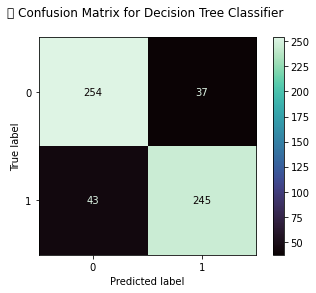

In [146]:
class_names = df.columns
metrics.plot_confusion_matrix(Classifier, X_test, Y_test, cmap='mako')
plt.title('\t Confusion Matrix for Decision Tree Classifier \n')
plt.show()

# With the help of above confusion matrix I am able to understand the number of times I got the correct outputs and the number of times my model missed to provide the correct prediction (depicting in the black boxes)